<a href="https://colab.research.google.com/github/Kimjibeom/Python_Example/blob/main/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5(supervised_learning)_%EB%B6%84%EB%A5%98%EC%99%80_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지도학습 알고리즘

In [1]:
pip install mglearn

한글 깨짐 방지

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 83 not upgraded.


In [3]:
import mglearn
import matplotlib.pyplot as plt
# 한글 폰트 설치
import matplotlib.font_manager as fm  # 폰트 관련 용도

# 나눔 고딕 인스톨
!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고
# fm._rebuild() 를 해줘야 system 에 추가 설치된 폰트를 matplotilb.font_manager 가 알아차리는 것으로 보인다.
fm._rebuild()

NanumMyeongjo


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


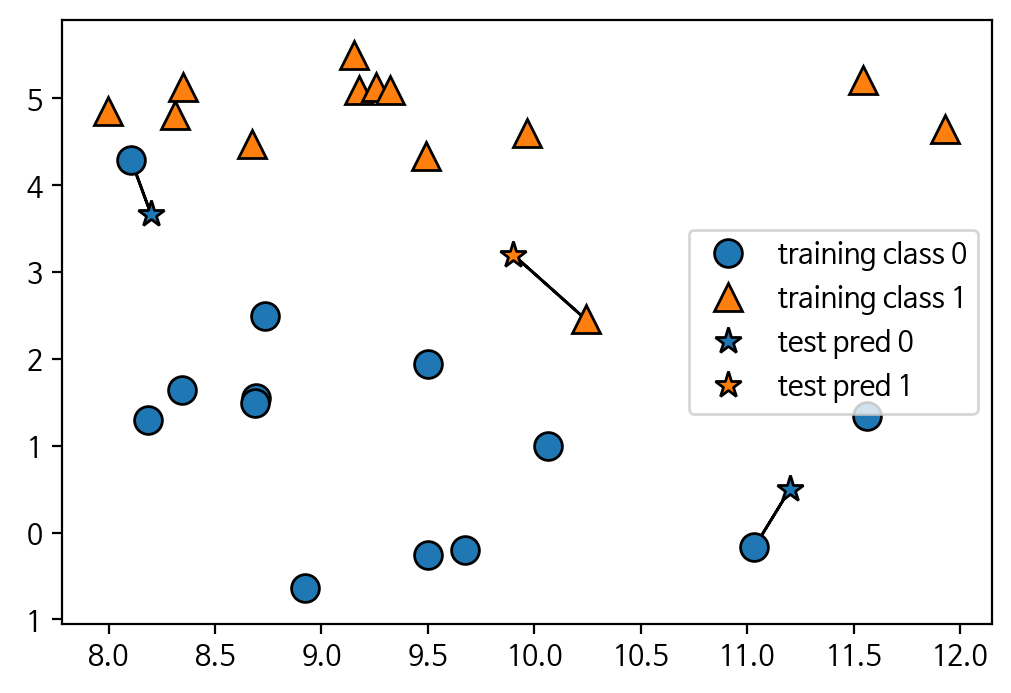

In [4]:
plt.figure(dpi = 100)
plt.rc('font', family = 'NanumBarunGothic')

mglearn.plots.plot_knn_classification(n_neighbors=1) # 제일 근접한 1개 이웃 선택

Text(0, 0.5, '타깃')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


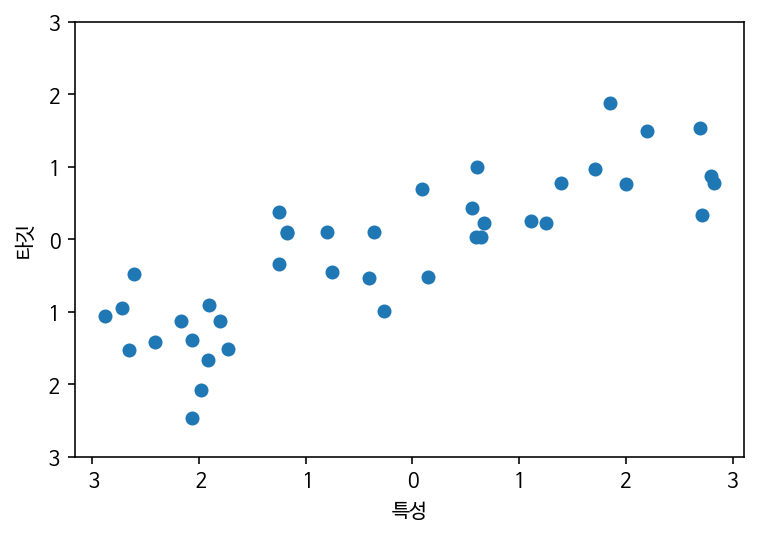

In [5]:
# X.shape 값에서 알 수 있듯이 이 데이터셋은 데이터 포인트 26개와 특성 2개를 가집니다.
# 회귀 알고리즘 설명에는 인위적으로 만든 wave 데이터셋을 사용하겠습니다.

# wave 데이터셋은 입력 특성 하나와 모델링할 타깃 변수(또는 응답)을 가집니다.

# 특성을 x축에 놓고 회귀의 타깃(출력)을 y축에 놓았습니다.
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

데이터 준비하기

In [6]:
x,y = mglearn.datasets.make_forge() # x : 데이터(feature), y : 레이블(label, 정답)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


일반화 성능을 평가할 수 있도록 데이터 분리 (교차검증)-> 훈련세트(trainset)테스트세트(testset)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=7)

KNeighborsClassifier를 임포트하고 객체 생성

In [14]:
from sklearn.neighbors import KNeighborsClassifier
X,y =mglearn.datasets.make_forge()

clf = KNeighborsClassifier(n_neighbors=3) # 이웃의 수 3개 지정

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


훈련 세트를 사용하여 분류 모델 학습

In [15]:
clf.fit(X_train, y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

테스트 데이터에 대해 predict 메서드를 호출해서 예측

테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산 -> 다음 가장 많은 클래스를 찾기 -> 예측

In [16]:
clf.predict(X_test)

array([0, 1, 0, 0, 0, 1, 1])

모델이 얼마나 잘 일반화되었는지 평가-> 정확도

score() 함수 사용 -> 테스트 데이터와 테스트 레이블을 넣어 호출

In [17]:
clf.score(X_test, y_test)

0.8571428571428571

In [18]:
clf.score(X_train, y_train)

0.9473684210526315

KNeighborsClassifier 분석

*   이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있음
*   이웃의 수를 늘릴수록 경계는 더 부드러워짐
*   부드러운 경계는 더 단순한 모델을 의미





<function matplotlib.pyplot.show>

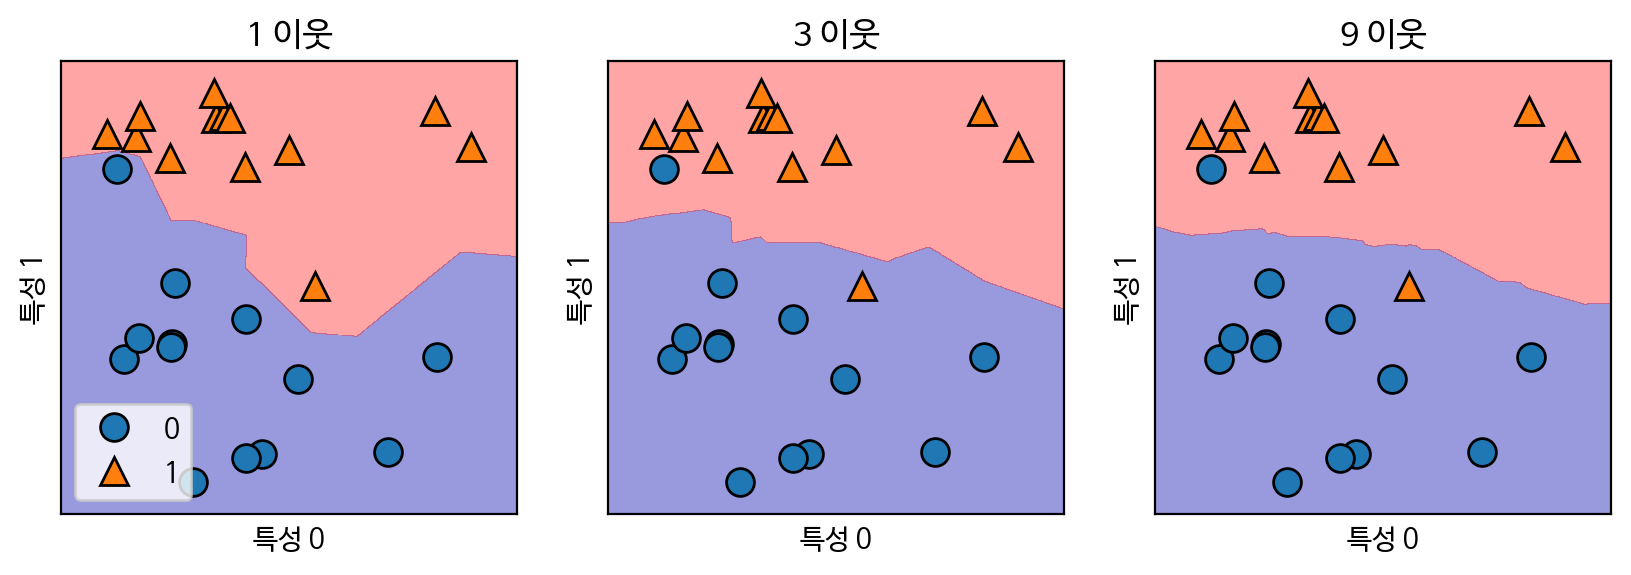

In [27]:
fig, axes = plt.subplots(1,3, figsize=(10,3), dpi = 100)

for n_neighbors, ax in zip([1,3,9], axes) : # 이웃을 1,3,9 일 때의 결정 경계(decision boundary)

  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x, y)

  # 2차원 데이터셋 분할 평면 그리기 mglearn.plot_2d_separator(model 객체, train 데이터, 평면 칠하기, 투명도)
  mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, ax=ax, alpha=.4) # 결정 경계 그리기
  mglearn.discrete_scatter(X[:,0],X[:,1],y, ax=ax)  # 2차원 산점도의 데이터셋 그리기 위해

  ax.set_title("{} 이웃".format(n_neighbors))
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")

axes[0].legend(loc=3)
plt.show

이웃의 수(결정경계)에 따른 성능 평가

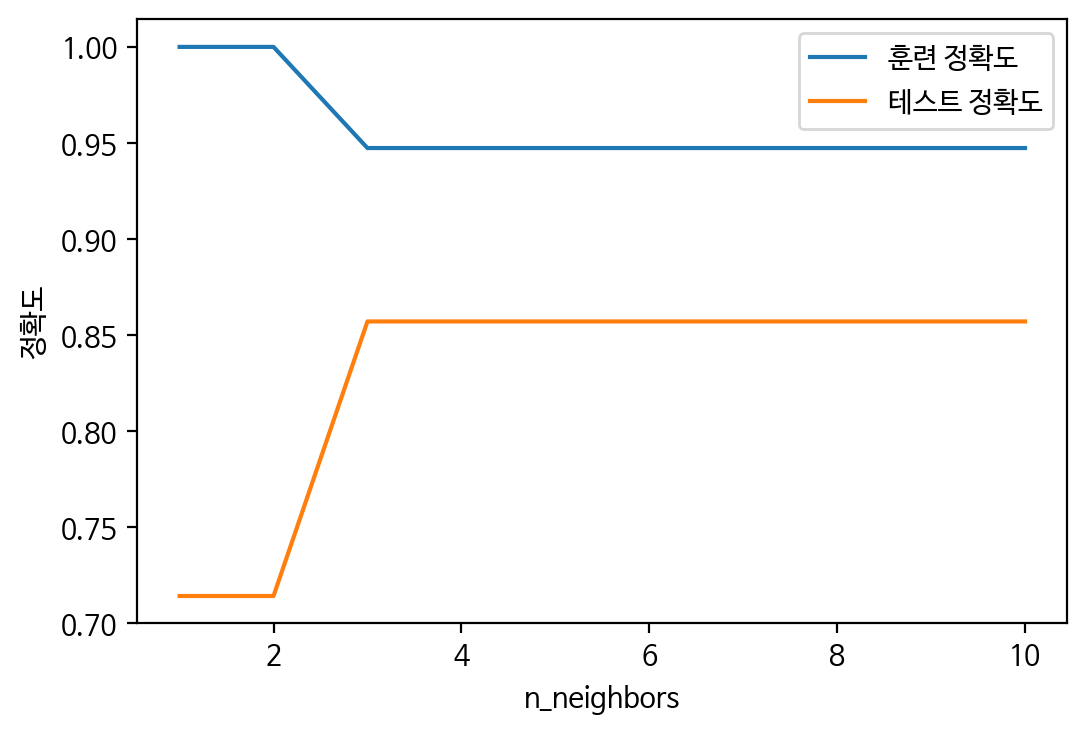

In [32]:
#이웃의 수에 따른 정확도 저장할 리스트 변수

train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_nerighbors를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings :

  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  #훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train, y_train))

  #테스트 세트 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

# 훈련 vs 테스트 정확도 시각화
plt.figure(dpi = 100)
plt.rc('font', family = 'NanumBarunGothic')

plt.plot(neighbors_settings,train_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings,test_accuracy, label='테스트 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

유방암 데이터셋을 사용하여 이웃의 수(결정경계)에 따른 성능 평가

데이터셋 준비하기

In [35]:
from sklearn.datasets import load_breast_cancer

cancer =load_breast_cancer() # 데이터 다운로드

데이터셋 분리하기 (훈련셋, 테스트셋)

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=7
) # stratify는 비율에 맞게 잘라줌


이웃의 수(결정경계)에 따른 성능 평가

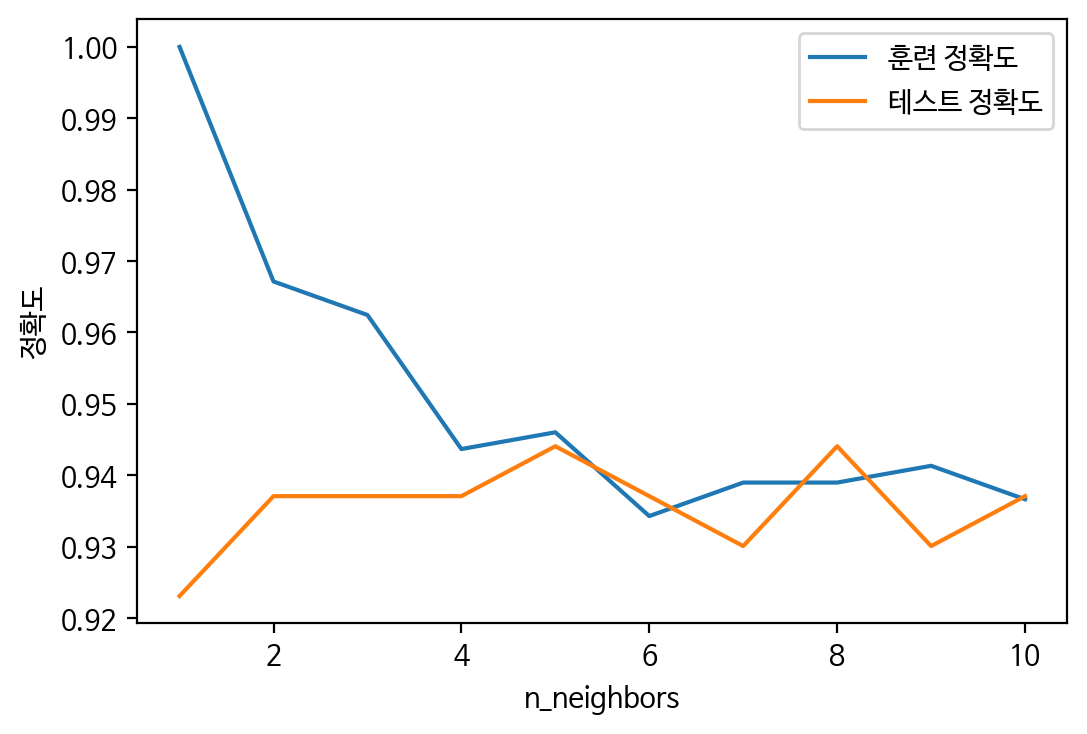

In [42]:
#이웃의 수에 따른 정확도 저장할 리스트 변수

train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_nerighbors를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings :

  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(x_train, y_train)

  #훈련 세트 정확도 저장
  train_accuracy.append(clf.score(x_train, y_train))

  #테스트 세트 정확도 저장
  test_accuracy.append(clf.score(x_test, y_test))

# 훈련 vs 테스트 정확도 시각화
plt.figure(dpi = 100)
plt.rc('font', family = 'NanumBarunGothic')

plt.plot(neighbors_settings,train_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings,test_accuracy, label='테스트 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

성능평가- ROC 커브

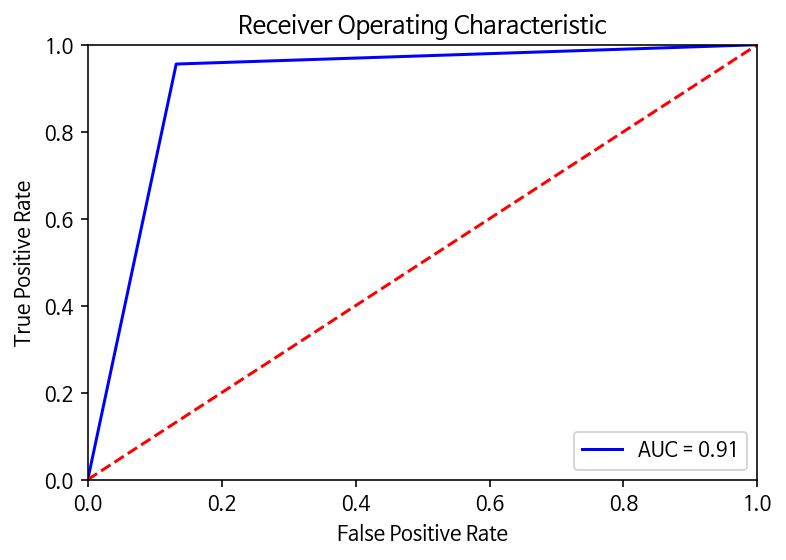

In [45]:
# Library for Analysing the ML model
from sklearn import metrics

# 모델 생성
clf = KNeighborsClassifier(n_neighbors=1).fit(x_train, y_train)
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

평가

In [46]:
# test data를 가지고 y_hat을 예측 (분류)
y_hat = clf.predict(x_test)

# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        53
           1       0.92      0.96      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



In [47]:
# sklearn 을 이용하면 전부 계산해준다.
print('accuracy: ', metrics.accuracy_score(y_test,y_hat))
print('precision: ', metrics.precision_score(y_test,y_hat))
print('recall: ', metrics.recall_score(y_test,y_hat))
print('f1: ', metrics.f1_score(y_test,y_hat))

accuracy:  0.9230769230769231
precision:  0.9247311827956989
recall:  0.9555555555555556
f1:  0.9398907103825136
